# Padronizando os atributos

Neste exemplo, veremos como a padronização dos atributos afeta positivamente o desempenho do algoritmo do gradiente descendente.

In [20]:
# Import all necessary libraries
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import random
import urllib
# Retrieve file from github.
url = 'https://raw.githubusercontent.com/zz4fap/t319_aprendizado_de_maquina/main/misc/util_functions.py'
urllib.request.urlretrieve(url, filename='./util_functions.py')
import util_functions as util

In [21]:
# Always reset the pseudo-random numbers generator to a known value so that your results are always the same.
np.random.seed(1234)

## Gerando o conjunto de treinamento

In [22]:
# Number of pairs attribute/label.
N = 10000

A função objetivo é dada por

$$y = x_1 + x_2,$$

onde $a_1$ e $a_2$ são iguais a 1.

Os atributos são

$$x_1 = 10 \times \text{randn()} + 10,$$

$$x_2 = \text{randn()}.$$

**Observação**: Notem que o intervalo de variação de $x_1 \gg x_2$, pois sua variância é maior, e, além disso, sua média não é 0 e sim, 10. Isso pode será melhor visualizado através dos histogramas mostrados na figura abaixo.



In [23]:
# Attribute 1
x1 = 10.0*np.random.randn(N, 1) + 10.0

# Attribute 2
x2 = np.random.randn(N, 1)

# Target function.
y = x1 + x2

# Noise.
w = np.random.randn(N, 1)

# Noisy version.
y_noisy = y + w

## 1. Sem escalonamento dos atributos

Plotando os histogramas dos atributos x1 e x2

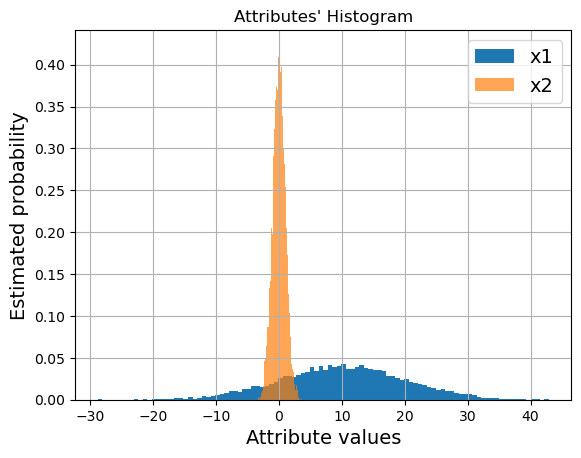

In [24]:
# Histograma dos atributos x1 e x2
util.plotHistogram(x1, x2)

### Encontrando os melhores pesos com o gradiente descendente em batelada

A função hipótese que usaremos tem o seguinte formato:

$$h(\textbf{x}) = \hat{a}_1 x_1 + \hat{a}_2 x_2.$$

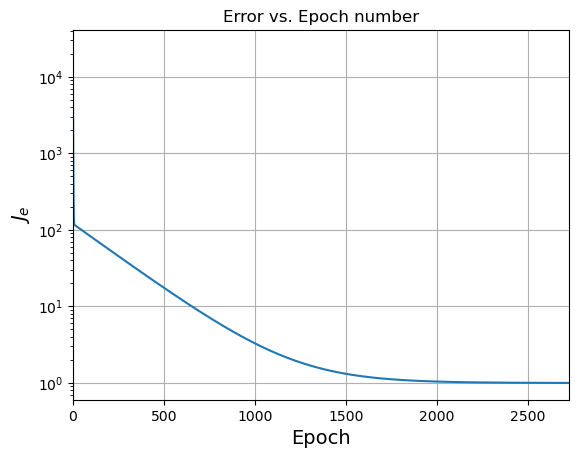

In [25]:
# Concatenate both column vectors to create the attribute matrix.
X = np.c_[x1, x2]

# Learning rate.
alpha = 0.001

# Maximum number of epochs.
numOfEpochs = 10000

# Execute the gradient descent algorithm to find a solution to this regression problem.
a_gd, Jgd, a_hist, grad_hist, iteration = util.batchGradientDescent(X, y_noisy, alpha, numOfEpochs)

# Plot the error versus the number of iterations.
util.plotErroVersusIteration(Jgd, iteration)

**Observação**: Percebam na figura acima, que levou mais de 2000 épocas para que o algoritmo convergisse. Isso é devido ao formato do superfície de erro, a qual é plotada logo abaixo.

### Encontrando os pesos ótimos com a equação normal.

In [26]:
# Closed-form solution.
a_opt = util.calculateOptimumWeights(X, y_noisy)

### Comparando os pesos encontrados com a equação normal e com o gradiente descendente.

In [27]:
print('a1_opt:', a_opt[0, 0])
print('a2_opt:', a_opt[1, 0])

print('\na1_gd:', a_gd[0, 0])
print('a2_gd:', a_gd[1, 0])

a1_opt: 1.0003474442716964
a2_opt: 0.9999792224061842

a1_gd: 1.0003261055618753
a2_gd: 0.9495272418128274


### Plotando as superfícies de erro e de contorno

**OBS**.: A estrela vermelha na superfície de contorno indica a solução ótima encontrada com a equação normal.

In [28]:
# Generate points for plotting the cost-function surface without feature scaling.
J, A1, A2 = util.calculateErrorSurface(X, y_noisy)

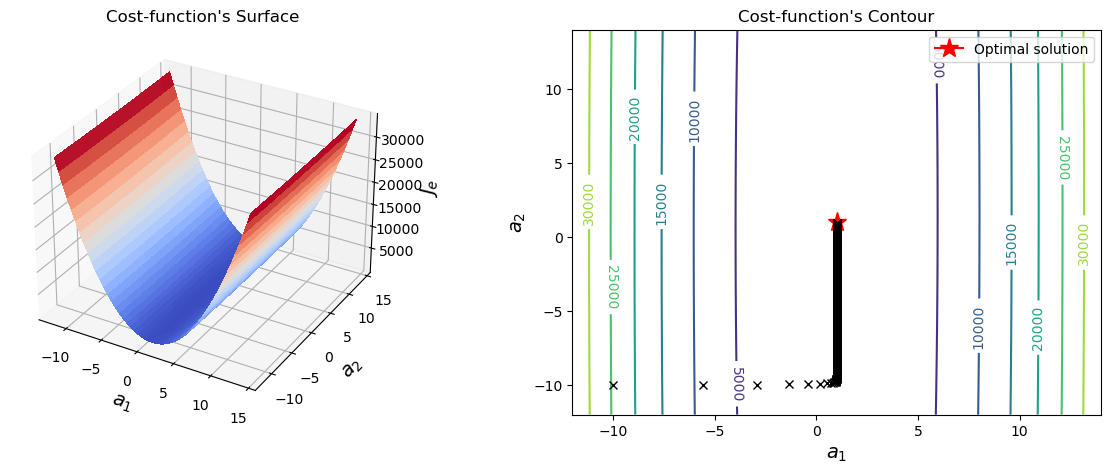

In [29]:
# Plot cost-function surface.
util.plotCostFunction(A1, A2, J, a_opt, a_hist, iteration)

#### Observações

+ Quando $x_1 \gg x_2$: erro varia mais rapidamente com variações de $\hat{a}_1$, resultando em um formato de vale.
<br/><br/>

+ O gradiente descendente sempre caminha na direção de máxima declividade, mas aqui, ele não aponta (caminha) diretamente para o ponto de mínimo global, ele aponta para a base do vale.
<br/><br/>

+ Inicialmente, a direção de máxima declividade está quase que paralela ao eixo do peso $a_1$, pois $x_1$ tem intervalo de variação maior.
<br/><br/>

+ Notem que o algoritmo se aproxima do valor ótimo de $\hat{a}_1$ muito mais rapidamente do que do valor ótimo de $\hat{a}_2$.
   * Em torno de 10 iterações, o algoritmo sai do valor inicial, $\hat{a}_1=-10$ e $\hat{a}_2=-10$ e se aproxima do valor $\hat{a}_1=1$, porém, o valor de $\hat{a}_2$ continua muito próximo de $-10$. Isso se deve à inclinação da superfície, que é muito maior no sentido de $\hat{a}_1$ do que no de $\hat{a}_2$.
   * Depois de chegar à base do vale e estar muito próximo do valor ótimo de $\hat{a}_1$, o algoritmo precisa de 2500 épocas de treinamento para se aproximar do valor ideal de $\hat{a}_2$. Isso se deve à inclinação da superfície ser muito pequena no sentido de $\hat{a}_2$, fazendo com que os gradientes e, consequentemente, as atualizações do peso sejam muito pequenas, resultando em uma convergência muito lenta.
<br/><br/>

+ Porém, quando o algoritmo chega à base do vale, a inclinação se torna pequena, fazendo com que o gradiente também seja pequeno. Consequentemente, as atualização dos pesos serão pequenas.
    + Convergência lenta devido ao formato da superfície.
    + Convergência só ocorre após 2000 épocas.

### Plotando o histórico dos valores do vetor gradiente ao longo das épocas de treinamento

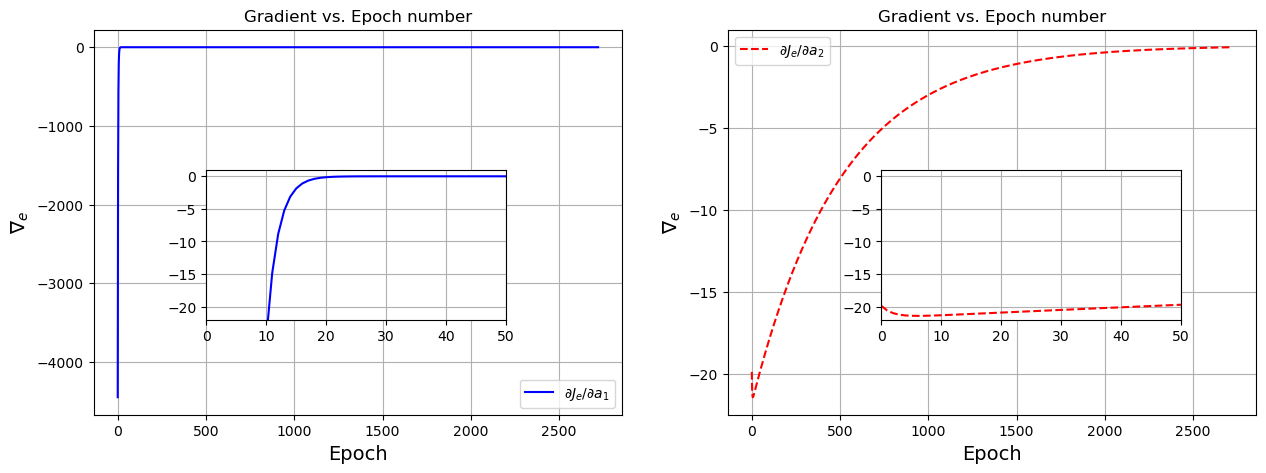

In [11]:
util.plotGradientHistory(grad_hist, iteration, x_max=50)

**Observações**

+ Percebam que o gradiente varia muito mais rapidamente com relação ao peso $\hat{a}_1$ do que com o peso $\hat{a}_2$.
+ Isso se deve ao fato da superfície ser mais íngreme na direção de $\hat{a}_1$.
+ Como os valores dos vetores gradiente variam lentamente em relação ao peso $\hat{a}_2$, a convergência se torna lenta, consecutivamente.

## 2. Padronizando os atributos

+ Agora iremos aplicar padronização aos atributos, trazendo-os para um intervalo mais similar.
<br/><br/>

+ Utilizamos a classe `StandardScaler` do módulo `preprocessing` da biblioteca SciKit-Learn.
<br/><br/>

+ O método `fit_transform` calcula a média e o devio padrão de cada atributo e, em seguida, aplica a padronização a cada exemplo da base de dados.

In [12]:
# Import Class StandardScaler from module Preprocessing of
# library sklearn responsible for standardizing the data.
from sklearn.preprocessing import StandardScaler

# Instantiate a Standard scaler.
stdScaler = StandardScaler()

# Standardize the features.
scaled_X = stdScaler.fit_transform(X)

#### Plotando os histogramas dos atributos x1 e x2 padronizados.

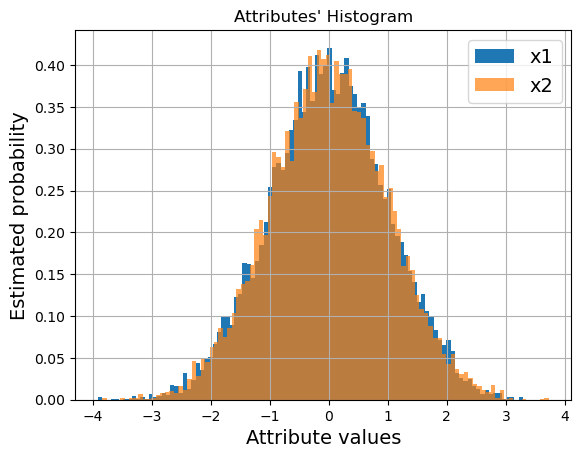

In [13]:
scaled_x1 = scaled_X[:,0].reshape(N,1)
scaled_x2 = scaled_X[:,1].reshape(N,1)

util.plotHistogram(scaled_x1, scaled_x2)

**Observações**:
    
+ Percebam que após a padronização, os intervalos de variação dos atributos passaram a ser similares.
+ Além disso, ambos os atributos estão centrados em 0.

### Encontrando os melhores pesos com o gradiente descendente em batelada

A função hipótese que usaremos tem o seguinte formato:

$$h(\textbf{x}) = \hat{a}_1 x_1 + \hat{a}_2 x_2.$$

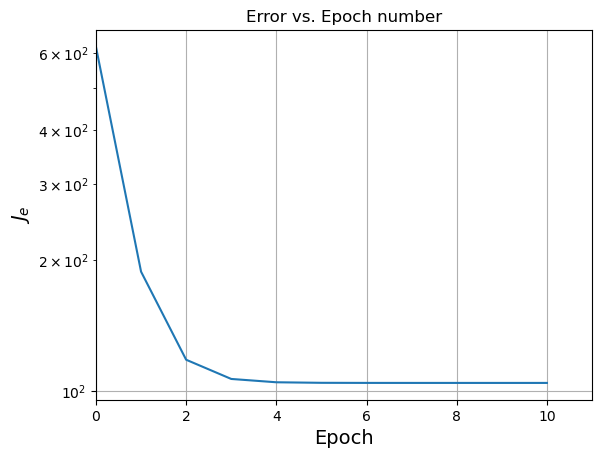

In [14]:
# learning rate.
alpha = 0.3

# Maximum number of epochs.
numOfEpochs = 10000

# Execute the gradient descent algorithm to find a solution to this regression problem.
a_gd_pad, Jgd, a_hist, grad_hist, iteration = util.batchGradientDescent(scaled_X, y_noisy, alpha, numOfEpochs)

# Plot the error versus the number of iterations.
util.plotErroVersusIteration(Jgd, iteration)

**Observações**:

+ Percebam na figura acima, que o algoritmo convergiu após 4 épocas de treinamento. Isso é devido ao formato do superfície de erro, a qual é plotada logo abaixo.
<br/><br/>
+ O menor erro agora é igual à aproximadamente 100. Isso se deve ao fato de $x_1$ ter média igual a 10 e o EQM calcular o quadrado das diferenças.

### Encontrando os pesos ótimos com a equação normal.

In [15]:
# Closed-form solution.
a_opt_pad = util.calculateOptimumWeights(scaled_X, y_noisy)

### Comparando os pesos encontrados com a equação normal e com o gradiente descendente.

In [16]:
print('a1_opt_pad:', a_opt_pad[0, 0])
print('a2_opt_pad:', a_opt_pad[1, 0])

print('\na1_gd_pad:', a_gd_pad[0, 0])
print('a2_gd_pad:', a_gd_pad[1, 0])

a1_opt_pad: 9.955022548789374
a2_opt_pad: 0.9940733973786412

a1_gd_pad: 9.954132700439594
a2_gd_pad: 0.9935216435223956


**Observação**:

+ Percebam que o valor do peso $\hat{a}_1$ foi modificado.
+ Ele foi o único alterado, pois $x_2$ já está padronizado (os valores são retirados de uma distribuição normal padrão) e, consequentemente, $\hat{a}_2$ não é modificado.
+ O escalonamento (qualquer tipo) modifica os valores dos pesos originais.
   * Se a escala dos atributos é alterada, para que o modelo ainda prediga os mesmos valores de saída (i.e., rótulos), os pesos precisam ter seus valores alterados (ver anexo I do material de aula: Regressão Linear (Parte IV))

### Plotando as superfícies de erro e de contorno

**OBS**.: A estrela vermelha na superfície de contorno indica a solução ótima encontrada com a equação normal.

In [17]:
# Generate points for plotting the cost-function surface without feature scaling.
J, A1, A2 = util.calculateErrorSurface(scaled_X, y_noisy, -10.0, 30.0, -19.0, 21.0)

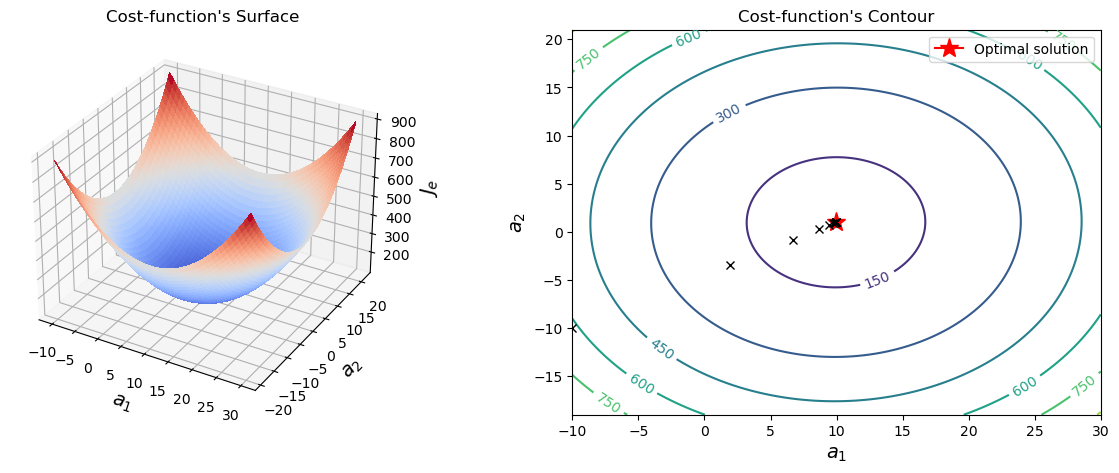

In [18]:
# Plot cost-function surface.
util.plotCostFunction(A1, A2, J, a_opt_pad, a_hist, iteration)

#### Observações

+ Quando $x_1$ e $x_2$ têm intervalos de variação semelhantes, então, a variação tanto de $\hat{a}_1$ quanto de $\hat{a}_2$ tem peso semelhante na variação do erro (i.e., no seu cálculo), fazendo com que a superfície tenha um formato de tigela (i.e., circular).
<br/><br/>

+ O gradiente descendente sempre caminha (aponta) na direção de máxima declividade e, aqui, devido à variação do erro ser similar em todas as direções, ele aponta (caminha) diretamente para o ponto de mínimo global.
<br/><br/>

+ A direção de máxima declividade está exatamente entre os eixos de $a_1$ e $a_2$ (i.e., $\approx 45^o$), pois $x_1$ e $x_2$ têm intervalos de variação similares.
<br/><br/>

+ Notem que o algoritmo se aproxima dos valores ótimos de $\hat{a}_1$ e $\hat{a}_2$ rapidamente.
   * Em torno de 4 iterações, o algoritmo sai do valor inicial, $\hat{a}_1=-10$ e $\hat{a}_2=-10$ e se aproxima dos valores $\hat{a}_1=1$ e $\hat{a}_2=1$. Isso se deve à inclinação da superfície, que agora é similar em ambas as direções, fazendo com que os elementos do vetor gradiente variem de forma similar e rápida em direção ao ponto mais baixo da superfície de erro. Consequentemente, as atualizações dos pesos serão maiores e a convergência é acelerada.
<br/><br/>

+ Convergência é rápida devido ao formato de tigela (circular) da superfície.
    + Em aproximadamente 4 épocas já temos convergência.

### Plotando o histórico dos valores do vetor gradiente ao longo das épocas de treinamento

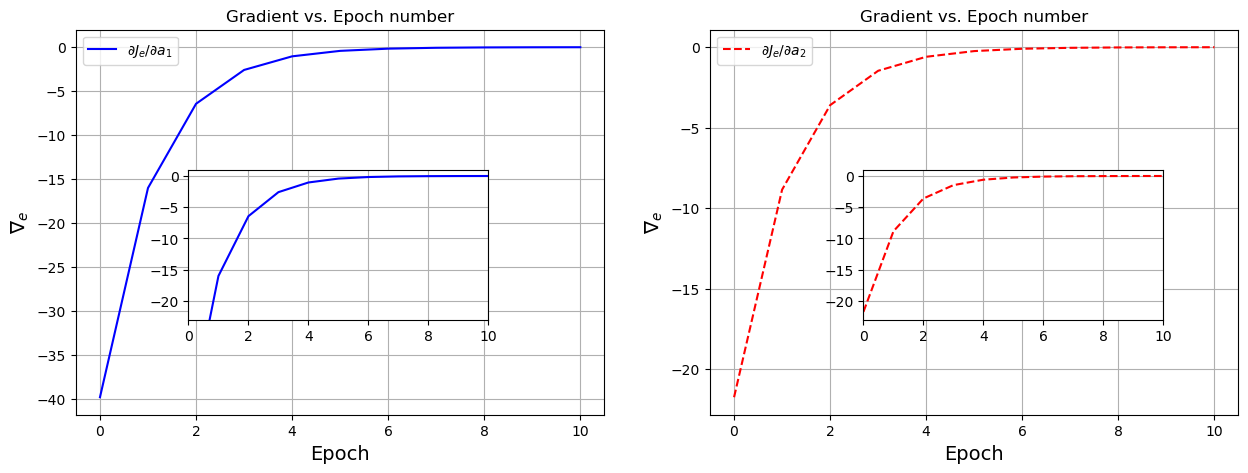

In [19]:
# Plot gradient history.
util.plotGradientHistory(grad_hist, iteration, x_max=10)

**Observações**

+ Percebam que o gradiente varia de forma similar em relação aos dois pesos.
<br/><br/>

+ Isso indica que a superfície de erro é circular, pois sua inclinação é semelhante em ambas as direções, resultando em elementos do vetor gradiente com valores similares.
<br/><br/>

+ A superfície tem inclinação semelhante em ambas as direções.
<br/><br/>

+ Como os valores dos vetores gradiente em relação a ambos os pesos tendem a zero rapidamente, a convergência se torna rápida, consecutivamente.